# Generating synthetic data with AgML and Helios plant simulator

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Import synthetic data module from AgML. This will clone the latest version of Helios, if not installed. Otherwise, it will update to the latest version.

In [1]:
from agml._internal import syntheticdata

Installing Helios
Pulling latest version of Helios


From https://github.com/PlantSimulationLab/Helios_autolabeldev
 * branch              master     -> FETCH_HEAD


Already up to date.
Found existing install of Helios.


Instace the data generator

In [11]:
hdg = syntheticdata.HeliosDataGenerator() 

In [18]:
def txt2image(path):
    data = np.loadtxt(path)
    data = np.where(data > 20, 0, data) # Change background numbers to zero
    plt.imshow(data,'gray')
    plt.pcolormesh(data, cmap='gist_rainbow')
    plt.colorbar()
    plt.show()

## Camera parameter selection

In [24]:
#---------------- CAMERA PARAMETERS --------------------
camera_positions = [[0,-4,1],[1,-4,1],[2,-4,1]]
hdg.camera_param_ranges['camera_position'] = camera_positions
hdg.camera_param_ranges['camera_lookat'] = [[0,0,1],[1,0,1],[2,0,1]]
hdg.camera_param_ranges['image_resolution'] = [500, 500]

## Canopy parameters

### VSP Grapevine

    <VSPGrapevineParameters>
      <canopy_origin>0.0</canopy_origin>
      <canopy_rotation>0.0</canopy_rotation>
      <cluster_height_max>0.15</cluster_height_max>
      <cluster_radius>0.03</cluster_radius>
      <cordon_height>0.9</cordon_height>
      <cordon_radius>0.02</cordon_radius>
      <grape_color>0.18 0.2 0.25</grape_color>
      <grape_radius>0.0075</grape_radius>
      <grape_subdivisions>8.0</grape_subdivisions>
      <leaf_spacing_fraction>0.5</leaf_spacing_fraction>
      <leaf_subdivisions>1.0 1.0</leaf_subdivisions>
      <leaf_texture_file>plugins/canopygenerator/textures/GrapeLeaf.png</leaf_texture_file>
      <leaf_width>0.18</leaf_width>
      <plant_count>5.0 1.0</plant_count>
      <plant_height>1.5036436274306861</plant_height>
      <plant_spacing>2.0</plant_spacing>
      <row_spacing>2.0</row_spacing>
      <shoot_length>0.9</shoot_length>
      <shoot_radius>0.005</shoot_radius>
      <shoots_per_cordon>10.0</shoots_per_cordon>
      <trunk_height>0.7</trunk_height>
      <trunk_radius>0.05</trunk_radius>
      <wood_subdivisions>10.0</wood_subdivisions>
      <wood_texture_file>plugins/canopygenerator/textures/wood.jpg</wood_texture_file>
    </VSPGrapevineParameters>
    

In [28]:
# ---------------- CANOPY TYPE  -------------------
k = 'VSPGrapevine'
# ---------------- CANOPY PARAMETERS -------------------
hdg.canopy_param_ranges[k]['plant_count'] = [[5, 5],[1, 1]]
hdg.canopy_param_ranges[k]['plant_height'] = [[1, 2]]
hdg.canopy_param_ranges[k]['canopy_origin'] = [[0, 0, 0]]
# ---------------- GENERATE SYNTHETIC DATA -------------------
hdg.generate_data(n_imgs=1, canopy_type=k, annotation_type = 'semantic', simulation_type='rgb', label_elements='leaves, branches, trunk, fruits', output_directory='..') 

0
1
2
3
Generation synthetic data: #0
-- Symbol prefix: 
-- Building with BZip2
-- Creating directory /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config
-- Creating file /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config/ftconfig.h
-- Creating file /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config/ftoption.h
-- Using X11 for window creation


-- Loading 3 plug-ins
-- loading plug-in visualizer
DIST_NAME: libjpeg
DIST_VERSION: 9.1.0
DIST_LICENSE: jpeg license
DIST_AUTHOR: Tom Lane, Guido Vollbeding, Philip Gladstone, Bill Allombert, Jim Boucher, Lee Crocker, Bob Friesenhahn, Ben Jackson, Julian Minguillon, Luis Ortiz, George Phillips, Davide Rossi, Ge
DIST_MAINTAINER: Peter Kapec
DIST_URL: http://www.ijg.org/
DIST_DESC: Independent JPEG Group
DIST_DEPENDS: 
-- loading plug-in canopygenerator
-- loading plug-in syntheticannotation


-- Configuring done
-- Generating done
-- Build files have been written to: /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build
[  8%] Built target glfw
[ 14%] Built target genfiles
[ 23%] Built target zlibstatic
[ 32%] Built target png_static
[ 36%] Built target helios
[ 57%] Built target freetype
[ 58%] Built target glew_s
[ 81%] Built target jpeg
[ 82%] Built target visualizer
[ 84%] Built target syntheticannotation
[ 88%] Built target canopygenerator
Scanning dependencies of target SyntheticImageAnnotation_exe
[ 88%] Building CXX object CMakeFiles/SyntheticImageAnnotation_exe.dir/main.o
[ 88%] Linking CXX executable SyntheticImageAnnotation_exe
[ 88%] Built target SyntheticImageAnnotation_exe
[ 96%] Built target zlib
[ 97%] Built target glew
[ 98%] Built target visualinfo
[100%] Built target glewinfo
Loading XML file: ../xml/tmp_canopy_params_image.xml...done.
Reading XML file: ../xml/tmp_canopy_params_image.xml...Building canopy o

make[1]: Circular lib/all <- lib/all dependency dropped.
make[1]: Circular lib/all <- lib/all dependency dropped.


done.
Canopy consists of 1835 leaves and 1190536 total primitives.
Ground geometry...done.
Ground consists of 100 total primitives.
done.
Rendering RGB image containing 1190.64K primitives...Initializing graphics...done.
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00000/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00001/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00002/RGB_rendering.jpeg
done.
Generating labeled image containing 4 label groups...
Initializing graphics...done.
Performing semantic segmentation for view 0... and element: 
branches
clusters
leaves
trunks
Semantic segmentation ... done.
Performing semantic segmentation for view 1... and element: 
branches
clusters
leaves
trunks
Semantic segmentation ... done.
Performing semantic segmentation for view 2... and element: 
branches
clusters
leaves
trunks
Semantic segmentation ... done.


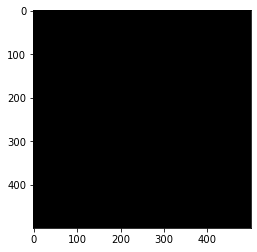

In [17]:
img = cv2.imread('/home/dariojavo/Documents/UCDavis/output/images/view00000/RGB_rendering.jpeg')
plt.imshow(img)

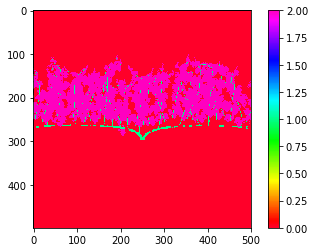

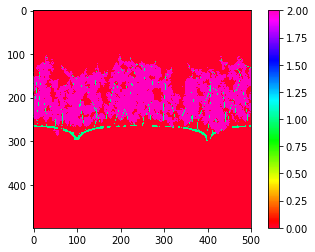

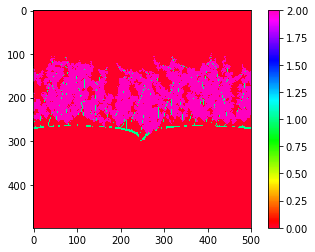

In [27]:
path = '/home/dariojavo/Documents/UCDavis/output/images/'

for i in range(len(camera_positions)):
    if i<10:
        txt2image(path + 'view0000' + str(i) + '/semantic_segmentation.txt')
    if i>=10:
        txt2image(path + 'view000' + str(i) + '/semantic_segmentation.txt')

### Split Grapevine

    <SplitGrapevineParameters>
      <canopy_origin>0.0</canopy_origin>
      <canopy_rotation>0.0</canopy_rotation>
      <cluster_height_max>0.1</cluster_height_max>
      <cluster_radius>0.03</cluster_radius>
      <cordon_height>1.5</cordon_height>
      <cordon_radius>0.02</cordon_radius>
      <cordon_spacing>10.0</cordon_spacing>
      <grape_color>0.18 0.2 0.25</grape_color>
      <grape_radius>0.0075</grape_radius>
      <grape_subdivisions>8.0</grape_subdivisions>
      <leaf_spacing_fraction>0.6</leaf_spacing_fraction>
      <leaf_subdivisions>1.0 1.0</leaf_subdivisions>
      <leaf_texture_file>plugins/canopygenerator/textures/GrapeLeaf.png</leaf_texture_file>
      <leaf_width>0.18</leaf_width>
      <plant_count>5.0 1.0</plant_count>
      <plant_height>1.0056300102423439</plant_height>
      <plant_spacing>2.0</plant_spacing>
      <row_spacing>4.0</row_spacing>
      <shoot_angle_base>0.0</shoot_angle_base>
      <shoot_angle_tip>1.256636</shoot_angle_tip>
      <shoot_length>1.2</shoot_length>
      <shoot_radius>0.0025</shoot_radius>
      <shoots_per_cordon>10.0</shoots_per_cordon>
      <trunk_height>1.3</trunk_height>
      <trunk_radius>0.05</trunk_radius>
      <wood_subdivisions>10.0</wood_subdivisions>
      <wood_texture_file>plugins/canopygenerator/textures/wood.jpg</wood_texture_file>
    </SplitGrapevineParameters>

In [13]:
# ---------------- CANOPY TYPE  -------------------
k = 'SplitGrapevine'
# ---------------- CANOPY PARAMETERS -------------------
hdg.canopy_param_ranges[k]['plant_count'] = [[5, 5],[1, 1]]
hdg.canopy_param_ranges[k]['plant_height'] = [[1, 2]]
hdg.canopy_param_ranges[k]['canopy_origin'] = [[0, 0, 0]]
# ---------------- GENERATE SYNTHETIC DATA -------------------
hdg.generate_data(n_imgs=1, canopy_type=k, annotation_type = 'semantic', simulation_type='rgb', label_elements='leaves, branches, trunk, fruits', output_directory='..') 

0
1
Generation synthetic data: #0
-- Symbol prefix: 
-- Building with BZip2
-- Creating directory /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config
-- Creating file /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config/ftconfig.h
-- Creating file /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config/ftoption.h


-- Loading 3 plug-ins
-- loading plug-in visualizer
DIST_NAME: libjpeg
DIST_VERSION: 9.1.0
DIST_LICENSE: jpeg license
DIST_AUTHOR: Tom Lane, Guido Vollbeding, Philip Gladstone, Bill Allombert, Jim Boucher, Lee Crocker, Bob Friesenhahn, Ben Jackson, Julian Minguillon, Luis Ortiz, George Phillips, Davide Rossi, Ge
DIST_MAINTAINER: Peter Kapec
DIST_URL: http://www.ijg.org/
DIST_DESC: Independent JPEG Group
DIST_DEPENDS: 
-- loading plug-in canopygenerator
-- loading plug-in syntheticannotation


-- Using X11 for window creation
-- Configuring done
-- Generating done
-- Build files have been written to: /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build
[  8%] Built target glfw
[ 14%] Built target genfiles
[ 23%] Built target zlibstatic
[ 32%] Built target png_static
[ 36%] Built target helios
[ 57%] Built target freetype
[ 58%] Built target glew_s
[ 81%] Built target jpeg
[ 82%] Built target visualizer
[ 84%] Built target syntheticannotation
[ 88%] Built target canopygenerator
Scanning dependencies of target SyntheticImageAnnotation_exe
[ 88%] Building CXX object CMakeFiles/SyntheticImageAnnotation_exe.dir/main.o
[ 88%] Linking CXX executable SyntheticImageAnnotation_exe
[ 88%] Built target SyntheticImageAnnotation_exe
[ 96%] Built target zlib
[ 97%] Built target glew
[ 98%] Built target visualinfo
[100%] Built target glewinfo
Loading XML file: ../xml/tmp_canopy_params_image.xml...done.
Reading XML file: ../xml/tmp_canopy_par

make[1]: Circular lib/all <- lib/all dependency dropped.
make[1]: Circular lib/all <- lib/all dependency dropped.


done.
Canopy consists of 1840 leaves and 1193212 total primitives.
Ground geometry...done.
Ground consists of 100 total primitives.
done.
Rendering RGB image containing 1193.31K primitives...Initializing graphics...done.
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00000/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00001/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00002/RGB_rendering.jpeg
done.
Generating labeled image containing 2 label groups...
Initializing graphics...done.
Performing semantic segmentation for view 0... and element: 
branches
leaves
Semantic segmentation ... done.
Performing semantic segmentation for view 1... and element: 
branches
leaves
Semantic segmentation ... done.
Performing semantic segmentation for view 2... and element: 
branches
leaves
Semantic segmentation ... done.


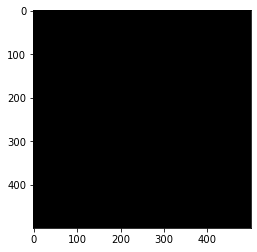

In [17]:
img = cv2.imread('/home/dariojavo/Documents/UCDavis/output/images/view00000/RGB_rendering.jpeg')
plt.imshow(img)

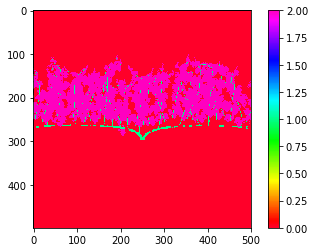

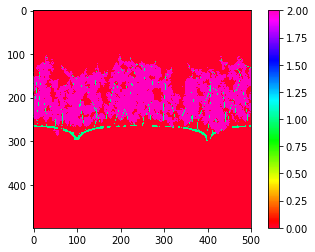

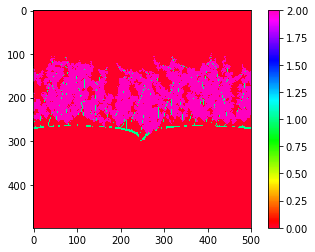

In [27]:
path = '/home/dariojavo/Documents/UCDavis/output/images/'

for i in range(len(camera_positions)):
    if i<10:
        txt2image(path + 'view0000' + str(i) + '/semantic_segmentation.txt')
    if i>=10:
        txt2image(path + 'view000' + str(i) + '/semantic_segmentation.txt')

### Goblet Grapevine

    <GobletGrapevineParameters>
      <canopy_origin>0.0</canopy_origin>
      <canopy_rotation>0.0</canopy_rotation>
      <cluster_height_max>0.1</cluster_height_max>
      <cluster_radius>0.03</cluster_radius>
      <cordon_height>0.9</cordon_height>
      <cordon_radius>0.02</cordon_radius>
      <grape_color>0.18 0.2 0.25</grape_color>
      <grape_radius>0.0075</grape_radius>
      <grape_subdivisions>8.0</grape_subdivisions>
      <leaf_spacing_fraction>0.6</leaf_spacing_fraction>
      <leaf_subdivisions>1.0 1.0</leaf_subdivisions>
      <leaf_texture_file>plugins/canopygenerator/textures/GrapeLeaf.png</leaf_texture_file>
      <leaf_width>0.18</leaf_width>
      <plant_count>5.0 1.0</plant_count>
      <plant_height>1.2170181971310814</plant_height>
      <plant_spacing>2.0</plant_spacing>
      <row_spacing>2.0</row_spacing>
      <shoot_length>0.9</shoot_length>
      <shoot_radius>0.0025</shoot_radius>
      <shoots_per_cordon>10.0</shoots_per_cordon>
      <trunk_height>0.7</trunk_height>
      <trunk_radius>0.05</trunk_radius>
      <wood_subdivisions>10.0</wood_subdivisions>
      <wood_texture_file>plugins/canopygenerator/textures/wood.jpg</wood_texture_file>
    </GobletGrapevineParameters>

In [13]:
# ---------------- CANOPY TYPE  -------------------
k = 'GobletGrapevine'
# ---------------- CANOPY PARAMETERS -------------------
hdg.canopy_param_ranges[k]['plant_count'] = [[5, 5],[1, 1]]
hdg.canopy_param_ranges[k]['plant_height'] = [[1, 2]]
hdg.canopy_param_ranges[k]['canopy_origin'] = [[0, 0, 0]]
# ---------------- GENERATE SYNTHETIC DATA -------------------
hdg.generate_data(n_imgs=1, canopy_type=k, annotation_type = 'semantic', simulation_type='rgb', label_elements='leaves, branches, trunk, fruits', output_directory='..') 

0
1
Generation synthetic data: #0
-- Symbol prefix: 
-- Building with BZip2
-- Creating directory /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config
-- Creating file /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config/ftconfig.h
-- Creating file /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config/ftoption.h


-- Loading 3 plug-ins
-- loading plug-in visualizer
DIST_NAME: libjpeg
DIST_VERSION: 9.1.0
DIST_LICENSE: jpeg license
DIST_AUTHOR: Tom Lane, Guido Vollbeding, Philip Gladstone, Bill Allombert, Jim Boucher, Lee Crocker, Bob Friesenhahn, Ben Jackson, Julian Minguillon, Luis Ortiz, George Phillips, Davide Rossi, Ge
DIST_MAINTAINER: Peter Kapec
DIST_URL: http://www.ijg.org/
DIST_DESC: Independent JPEG Group
DIST_DEPENDS: 
-- loading plug-in canopygenerator
-- loading plug-in syntheticannotation


-- Using X11 for window creation
-- Configuring done
-- Generating done
-- Build files have been written to: /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build
[  8%] Built target glfw
[ 14%] Built target genfiles
[ 23%] Built target zlibstatic
[ 32%] Built target png_static
[ 36%] Built target helios
[ 57%] Built target freetype
[ 58%] Built target glew_s
[ 81%] Built target jpeg
[ 82%] Built target visualizer
[ 84%] Built target syntheticannotation
[ 88%] Built target canopygenerator
Scanning dependencies of target SyntheticImageAnnotation_exe
[ 88%] Building CXX object CMakeFiles/SyntheticImageAnnotation_exe.dir/main.o
[ 88%] Linking CXX executable SyntheticImageAnnotation_exe
[ 88%] Built target SyntheticImageAnnotation_exe
[ 96%] Built target zlib
[ 97%] Built target glew
[ 98%] Built target visualinfo
[100%] Built target glewinfo
Loading XML file: ../xml/tmp_canopy_params_image.xml...done.
Reading XML file: ../xml/tmp_canopy_par

make[1]: Circular lib/all <- lib/all dependency dropped.
make[1]: Circular lib/all <- lib/all dependency dropped.


done.
Canopy consists of 1840 leaves and 1193212 total primitives.
Ground geometry...done.
Ground consists of 100 total primitives.
done.
Rendering RGB image containing 1193.31K primitives...Initializing graphics...done.
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00000/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00001/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00002/RGB_rendering.jpeg
done.
Generating labeled image containing 2 label groups...
Initializing graphics...done.
Performing semantic segmentation for view 0... and element: 
branches
leaves
Semantic segmentation ... done.
Performing semantic segmentation for view 1... and element: 
branches
leaves
Semantic segmentation ... done.
Performing semantic segmentation for view 2... and element: 
branches
leaves
Semantic segmentation ... done.


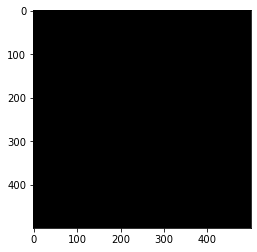

In [17]:
img = cv2.imread('/home/dariojavo/Documents/UCDavis/output/images/view00000/RGB_rendering.jpeg')
plt.imshow(img)

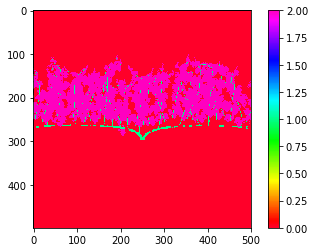

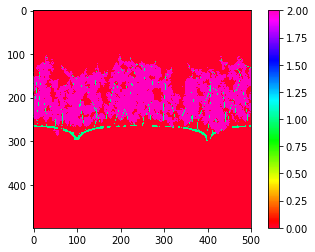

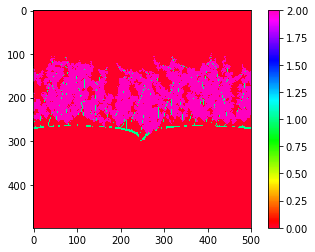

In [27]:
path = '/home/dariojavo/Documents/UCDavis/output/images/'

for i in range(len(camera_positions)):
    if i<10:
        txt2image(path + 'view0000' + str(i) + '/semantic_segmentation.txt')
    if i>=10:
        txt2image(path + 'view000' + str(i) + '/semantic_segmentation.txt')

### Unilateral Grapevine

    <UnilateralGrapevineParameters>
      <canopy_origin>0.0</canopy_origin>
      <canopy_rotation>0.0</canopy_rotation>
      <cluster_height_max>0.1</cluster_height_max>
      <cluster_radius>0.03</cluster_radius>
      <cordon_height>0.9</cordon_height>
      <cordon_radius>0.04</cordon_radius>
      <grape_color>0.18 0.2 0.25</grape_color>
      <grape_radius>0.0075</grape_radius>
      <grape_subdivisions>8.0</grape_subdivisions>
      <leaf_spacing_fraction>0.6</leaf_spacing_fraction>
      <leaf_subdivisions>1.0 1.0</leaf_subdivisions>
      <leaf_texture_file>plugins/canopygenerator/textures/GrapeLeaf.png</leaf_texture_file>
      <leaf_width>0.18</leaf_width>
      <plant_count>5.0 1.0</plant_count>
      <plant_height>1.080883282796714</plant_height>
      <plant_spacing>1.5</plant_spacing>
      <row_spacing>2.0</row_spacing>
      <shoot_length>0.9</shoot_length>
      <shoot_radius>0.0025</shoot_radius>
      <shoots_per_cordon>20.0</shoots_per_cordon>
      <trunk_height>0.7</trunk_height>
      <trunk_radius>0.05</trunk_radius>
      <wood_subdivisions>10.0</wood_subdivisions>
      <wood_texture_file>plugins/canopygenerator/textures/wood.jpg</wood_texture_file>
    </UnilateralGrapevineParameters>

In [13]:
# ---------------- CANOPY TYPE  -------------------
k = 'UnilateralGrapevine'
# ---------------- CANOPY PARAMETERS -------------------
hdg.canopy_param_ranges[k]['plant_count'] = [[5, 5],[1, 1]]
hdg.canopy_param_ranges[k]['plant_height'] = [[1, 2]]
hdg.canopy_param_ranges[k]['canopy_origin'] = [[0, 0, 0]]
# ---------------- GENERATE SYNTHETIC DATA -------------------
hdg.generate_data(n_imgs=1, canopy_type=k, annotation_type = 'semantic', simulation_type='rgb', label_elements='leaves, branches, trunk, fruits', output_directory='..') 

0
1
Generation synthetic data: #0
-- Symbol prefix: 
-- Building with BZip2
-- Creating directory /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config
-- Creating file /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config/ftconfig.h
-- Creating file /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config/ftoption.h


-- Loading 3 plug-ins
-- loading plug-in visualizer
DIST_NAME: libjpeg
DIST_VERSION: 9.1.0
DIST_LICENSE: jpeg license
DIST_AUTHOR: Tom Lane, Guido Vollbeding, Philip Gladstone, Bill Allombert, Jim Boucher, Lee Crocker, Bob Friesenhahn, Ben Jackson, Julian Minguillon, Luis Ortiz, George Phillips, Davide Rossi, Ge
DIST_MAINTAINER: Peter Kapec
DIST_URL: http://www.ijg.org/
DIST_DESC: Independent JPEG Group
DIST_DEPENDS: 
-- loading plug-in canopygenerator
-- loading plug-in syntheticannotation


-- Using X11 for window creation
-- Configuring done
-- Generating done
-- Build files have been written to: /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build
[  8%] Built target glfw
[ 14%] Built target genfiles
[ 23%] Built target zlibstatic
[ 32%] Built target png_static
[ 36%] Built target helios
[ 57%] Built target freetype
[ 58%] Built target glew_s
[ 81%] Built target jpeg
[ 82%] Built target visualizer
[ 84%] Built target syntheticannotation
[ 88%] Built target canopygenerator
Scanning dependencies of target SyntheticImageAnnotation_exe
[ 88%] Building CXX object CMakeFiles/SyntheticImageAnnotation_exe.dir/main.o
[ 88%] Linking CXX executable SyntheticImageAnnotation_exe
[ 88%] Built target SyntheticImageAnnotation_exe
[ 96%] Built target zlib
[ 97%] Built target glew
[ 98%] Built target visualinfo
[100%] Built target glewinfo
Loading XML file: ../xml/tmp_canopy_params_image.xml...done.
Reading XML file: ../xml/tmp_canopy_par

make[1]: Circular lib/all <- lib/all dependency dropped.
make[1]: Circular lib/all <- lib/all dependency dropped.


done.
Canopy consists of 1840 leaves and 1193212 total primitives.
Ground geometry...done.
Ground consists of 100 total primitives.
done.
Rendering RGB image containing 1193.31K primitives...Initializing graphics...done.
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00000/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00001/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00002/RGB_rendering.jpeg
done.
Generating labeled image containing 2 label groups...
Initializing graphics...done.
Performing semantic segmentation for view 0... and element: 
branches
leaves
Semantic segmentation ... done.
Performing semantic segmentation for view 1... and element: 
branches
leaves
Semantic segmentation ... done.
Performing semantic segmentation for view 2... and element: 
branches
leaves
Semantic segmentation ... done.


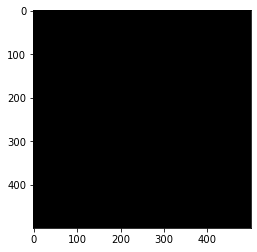

In [17]:
img = cv2.imread('/home/dariojavo/Documents/UCDavis/output/images/view00000/RGB_rendering.jpeg')
plt.imshow(img)

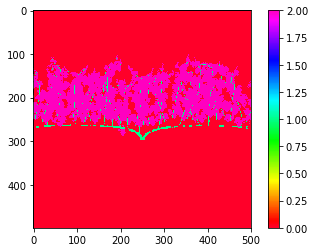

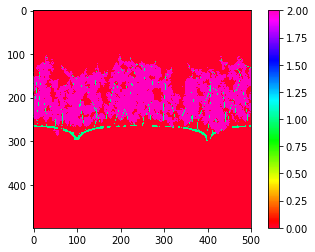

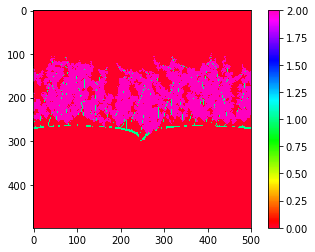

In [27]:
path = '/home/dariojavo/Documents/UCDavis/output/images/'

for i in range(len(camera_positions)):
    if i<10:
        txt2image(path + 'view0000' + str(i) + '/semantic_segmentation.txt')
    if i>=10:
        txt2image(path + 'view000' + str(i) + '/semantic_segmentation.txt')

### Walnut

In [13]:
# ---------------- CANOPY TYPE  -------------------
k = 'SplitGrapevine'
# ---------------- CANOPY PARAMETERS -------------------
hdg.canopy_param_ranges[k]['plant_count'] = [[5, 5],[1, 1]]
hdg.canopy_param_ranges[k]['plant_height'] = [[1, 2]]
hdg.canopy_param_ranges[k]['canopy_origin'] = [[0, 0, 0]]
# ---------------- GENERATE SYNTHETIC DATA -------------------
hdg.generate_data(n_imgs=1, canopy_type=k, annotation_type = 'semantic', simulation_type='rgb', label_elements='leaves, branches, trunk, fruits', output_directory='..') 

0
1
Generation synthetic data: #0
-- Symbol prefix: 
-- Building with BZip2
-- Creating directory /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config
-- Creating file /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config/ftconfig.h
-- Creating file /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config/ftoption.h


-- Loading 3 plug-ins
-- loading plug-in visualizer
DIST_NAME: libjpeg
DIST_VERSION: 9.1.0
DIST_LICENSE: jpeg license
DIST_AUTHOR: Tom Lane, Guido Vollbeding, Philip Gladstone, Bill Allombert, Jim Boucher, Lee Crocker, Bob Friesenhahn, Ben Jackson, Julian Minguillon, Luis Ortiz, George Phillips, Davide Rossi, Ge
DIST_MAINTAINER: Peter Kapec
DIST_URL: http://www.ijg.org/
DIST_DESC: Independent JPEG Group
DIST_DEPENDS: 
-- loading plug-in canopygenerator
-- loading plug-in syntheticannotation


-- Using X11 for window creation
-- Configuring done
-- Generating done
-- Build files have been written to: /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build
[  8%] Built target glfw
[ 14%] Built target genfiles
[ 23%] Built target zlibstatic
[ 32%] Built target png_static
[ 36%] Built target helios
[ 57%] Built target freetype
[ 58%] Built target glew_s
[ 81%] Built target jpeg
[ 82%] Built target visualizer
[ 84%] Built target syntheticannotation
[ 88%] Built target canopygenerator
Scanning dependencies of target SyntheticImageAnnotation_exe
[ 88%] Building CXX object CMakeFiles/SyntheticImageAnnotation_exe.dir/main.o
[ 88%] Linking CXX executable SyntheticImageAnnotation_exe
[ 88%] Built target SyntheticImageAnnotation_exe
[ 96%] Built target zlib
[ 97%] Built target glew
[ 98%] Built target visualinfo
[100%] Built target glewinfo
Loading XML file: ../xml/tmp_canopy_params_image.xml...done.
Reading XML file: ../xml/tmp_canopy_par

make[1]: Circular lib/all <- lib/all dependency dropped.
make[1]: Circular lib/all <- lib/all dependency dropped.


done.
Canopy consists of 1840 leaves and 1193212 total primitives.
Ground geometry...done.
Ground consists of 100 total primitives.
done.
Rendering RGB image containing 1193.31K primitives...Initializing graphics...done.
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00000/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00001/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00002/RGB_rendering.jpeg
done.
Generating labeled image containing 2 label groups...
Initializing graphics...done.
Performing semantic segmentation for view 0... and element: 
branches
leaves
Semantic segmentation ... done.
Performing semantic segmentation for view 1... and element: 
branches
leaves
Semantic segmentation ... done.
Performing semantic segmentation for view 2... and element: 
branches
leaves
Semantic segmentation ... done.


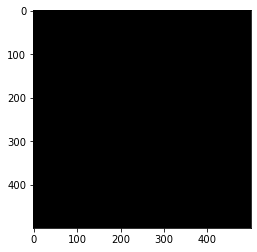

In [17]:
img = cv2.imread('/home/dariojavo/Documents/UCDavis/output/images/view00000/RGB_rendering.jpeg')
plt.imshow(img)

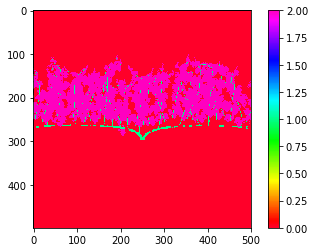

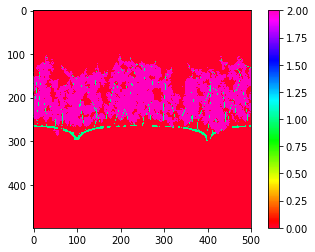

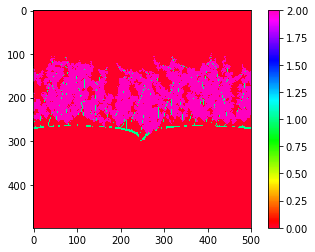

In [27]:
path = '/home/dariojavo/Documents/UCDavis/output/images/'

for i in range(len(camera_positions)):
    if i<10:
        txt2image(path + 'view0000' + str(i) + '/semantic_segmentation.txt')
    if i>=10:
        txt2image(path + 'view000' + str(i) + '/semantic_segmentation.txt')

### Tomato

    <TomatoParameters>
      <canopy_origin>0.0</canopy_origin>
      <canopy_rotation>0.0</canopy_rotation>
      <fruit_color>0.7 0.28 0.2</fruit_color>
      <fruit_radius>0.03</fruit_radius>
      <fruit_subdivisions>8.0</fruit_subdivisions>
      <leaf_length>0.2</leaf_length>
      <leaf_subdivisions>4.0 3.0</leaf_subdivisions>
      <leaf_texture_file>plugins/canopygenerator/textures/TomatoLeaf_big.png</leaf_texture_file>
      <plant_count>5.0 1.0</plant_count>
      <plant_height>1.9909318224703498</plant_height>
      <plant_spacing>2.0</plant_spacing>
      <row_spacing>2.0</row_spacing>
      <shoot_color>0.35 0.45 0.2</shoot_color>
      <shoot_subdivisions>10.0</shoot_subdivisions>
    </TomatoParameters>

In [13]:
# ---------------- CANOPY TYPE  -------------------
k = 'Tomato'
# ---------------- CANOPY PARAMETERS -------------------
hdg.canopy_param_ranges[k]['plant_count'] = [[5, 5],[1, 1]]
hdg.canopy_param_ranges[k]['plant_height'] = [[1, 2]]
hdg.canopy_param_ranges[k]['canopy_origin'] = [[0, 0, 0]]
# ---------------- GENERATE SYNTHETIC DATA -------------------
hdg.generate_data(n_imgs=1, canopy_type=k, annotation_type = 'semantic', simulation_type='rgb', label_elements='leaves, branches, fruits', output_directory='..') 

0
1
Generation synthetic data: #0
-- Symbol prefix: 
-- Building with BZip2
-- Creating directory /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config
-- Creating file /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config/ftconfig.h
-- Creating file /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config/ftoption.h


-- Loading 3 plug-ins
-- loading plug-in visualizer
DIST_NAME: libjpeg
DIST_VERSION: 9.1.0
DIST_LICENSE: jpeg license
DIST_AUTHOR: Tom Lane, Guido Vollbeding, Philip Gladstone, Bill Allombert, Jim Boucher, Lee Crocker, Bob Friesenhahn, Ben Jackson, Julian Minguillon, Luis Ortiz, George Phillips, Davide Rossi, Ge
DIST_MAINTAINER: Peter Kapec
DIST_URL: http://www.ijg.org/
DIST_DESC: Independent JPEG Group
DIST_DEPENDS: 
-- loading plug-in canopygenerator
-- loading plug-in syntheticannotation


-- Using X11 for window creation
-- Configuring done
-- Generating done
-- Build files have been written to: /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build
[  8%] Built target glfw
[ 14%] Built target genfiles
[ 23%] Built target zlibstatic
[ 32%] Built target png_static
[ 36%] Built target helios
[ 57%] Built target freetype
[ 58%] Built target glew_s
[ 81%] Built target jpeg
[ 82%] Built target visualizer
[ 84%] Built target syntheticannotation
[ 88%] Built target canopygenerator
Scanning dependencies of target SyntheticImageAnnotation_exe
[ 88%] Building CXX object CMakeFiles/SyntheticImageAnnotation_exe.dir/main.o
[ 88%] Linking CXX executable SyntheticImageAnnotation_exe
[ 88%] Built target SyntheticImageAnnotation_exe
[ 96%] Built target zlib
[ 97%] Built target glew
[ 98%] Built target visualinfo
[100%] Built target glewinfo
Loading XML file: ../xml/tmp_canopy_params_image.xml...done.
Reading XML file: ../xml/tmp_canopy_par

make[1]: Circular lib/all <- lib/all dependency dropped.
make[1]: Circular lib/all <- lib/all dependency dropped.


done.
Canopy consists of 1840 leaves and 1193212 total primitives.
Ground geometry...done.
Ground consists of 100 total primitives.
done.
Rendering RGB image containing 1193.31K primitives...Initializing graphics...done.
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00000/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00001/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00002/RGB_rendering.jpeg
done.
Generating labeled image containing 2 label groups...
Initializing graphics...done.
Performing semantic segmentation for view 0... and element: 
branches
leaves
Semantic segmentation ... done.
Performing semantic segmentation for view 1... and element: 
branches
leaves
Semantic segmentation ... done.
Performing semantic segmentation for view 2... and element: 
branches
leaves
Semantic segmentation ... done.


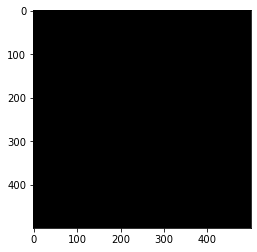

In [17]:
img = cv2.imread('/home/dariojavo/Documents/UCDavis/output/images/view00000/RGB_rendering.jpeg')
plt.imshow(img)

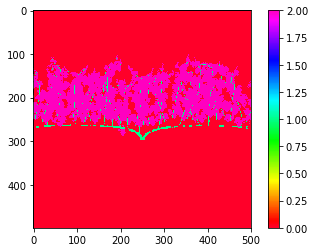

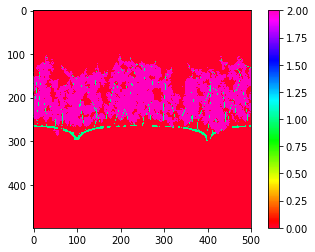

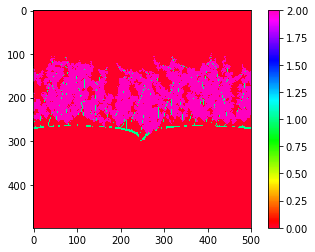

In [27]:
path = '/home/dariojavo/Documents/UCDavis/output/images/'

for i in range(len(camera_positions)):
    if i<10:
        txt2image(path + 'view0000' + str(i) + '/semantic_segmentation.txt')
    if i>=10:
        txt2image(path + 'view000' + str(i) + '/semantic_segmentation.txt')

### Strawberry

    <StrawberryParameters>
      <canopy_origin>0.0</canopy_origin>
      <canopy_rotation>0.0</canopy_rotation>
      <clusters_per_stem>0.6</clusters_per_stem>
      <fruit_radius>0.025</fruit_radius>
      <fruit_subdivisions>12.0</fruit_subdivisions>
      <fruit_texture_file>plugins/canopygenerator/textures/StrawberryTexture.jpg</fruit_texture_file>
      <leaf_length>0.1</leaf_length>
      <leaf_subdivisions>4.0 4.0</leaf_subdivisions>
      <leaf_texture_file>plugins/canopygenerator/textures/StrawberryLeaf.png</leaf_texture_file>
      <plant_count>5.0 1.0</plant_count>
      <plant_height>1.5977829276471345</plant_height>
      <plant_spacing>0.5</plant_spacing>
      <row_spacing>1.5</row_spacing>
      <stem_color>0.35 0.45 0.2</stem_color>
      <stem_radius>0.005</stem_radius>
      <stem_subdivisions>10.0</stem_subdivisions>
      <stems_per_plant>50.0</stems_per_plant>
    </StrawberryParameters>

In [13]:
# ---------------- CANOPY TYPE  -------------------
k = 'Strawberry'
# ---------------- CANOPY PARAMETERS -------------------
hdg.canopy_param_ranges[k]['plant_count'] = [[5, 5],[1, 1]]
hdg.canopy_param_ranges[k]['plant_height'] = [[1, 2]]
hdg.canopy_param_ranges[k]['canopy_origin'] = [[0, 0, 0]]
# ---------------- GENERATE SYNTHETIC DATA -------------------
hdg.generate_data(n_imgs=1, canopy_type=k, annotation_type = 'semantic', simulation_type='rgb', label_elements='leaves, branches, fruits', output_directory='..') 

0
1
Generation synthetic data: #0
-- Symbol prefix: 
-- Building with BZip2
-- Creating directory /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config
-- Creating file /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config/ftconfig.h
-- Creating file /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build/plugins/visualizer/lib/freetype-2.7/include/freetype/config/ftoption.h


-- Loading 3 plug-ins
-- loading plug-in visualizer
DIST_NAME: libjpeg
DIST_VERSION: 9.1.0
DIST_LICENSE: jpeg license
DIST_AUTHOR: Tom Lane, Guido Vollbeding, Philip Gladstone, Bill Allombert, Jim Boucher, Lee Crocker, Bob Friesenhahn, Ben Jackson, Julian Minguillon, Luis Ortiz, George Phillips, Davide Rossi, Ge
DIST_MAINTAINER: Peter Kapec
DIST_URL: http://www.ijg.org/
DIST_DESC: Independent JPEG Group
DIST_DEPENDS: 
-- loading plug-in canopygenerator
-- loading plug-in syntheticannotation


-- Using X11 for window creation
-- Configuring done
-- Generating done
-- Build files have been written to: /home/dariojavo/Documents/UCDavis/AgML-dev/agml/_helios/Helios/projects/SyntheticImageAnnotation/build
[  8%] Built target glfw
[ 14%] Built target genfiles
[ 23%] Built target zlibstatic
[ 32%] Built target png_static
[ 36%] Built target helios
[ 57%] Built target freetype
[ 58%] Built target glew_s
[ 81%] Built target jpeg
[ 82%] Built target visualizer
[ 84%] Built target syntheticannotation
[ 88%] Built target canopygenerator
Scanning dependencies of target SyntheticImageAnnotation_exe
[ 88%] Building CXX object CMakeFiles/SyntheticImageAnnotation_exe.dir/main.o
[ 88%] Linking CXX executable SyntheticImageAnnotation_exe
[ 88%] Built target SyntheticImageAnnotation_exe
[ 96%] Built target zlib
[ 97%] Built target glew
[ 98%] Built target visualinfo
[100%] Built target glewinfo
Loading XML file: ../xml/tmp_canopy_params_image.xml...done.
Reading XML file: ../xml/tmp_canopy_par

make[1]: Circular lib/all <- lib/all dependency dropped.
make[1]: Circular lib/all <- lib/all dependency dropped.


done.
Canopy consists of 1840 leaves and 1193212 total primitives.
Ground geometry...done.
Ground consists of 100 total primitives.
done.
Rendering RGB image containing 1193.31K primitives...Initializing graphics...done.
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00000/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00001/RGB_rendering.jpeg
writing JPEG image: /home/dariojavo/Documents/UCDavis/output/images/view00002/RGB_rendering.jpeg
done.
Generating labeled image containing 2 label groups...
Initializing graphics...done.
Performing semantic segmentation for view 0... and element: 
branches
leaves
Semantic segmentation ... done.
Performing semantic segmentation for view 1... and element: 
branches
leaves
Semantic segmentation ... done.
Performing semantic segmentation for view 2... and element: 
branches
leaves
Semantic segmentation ... done.


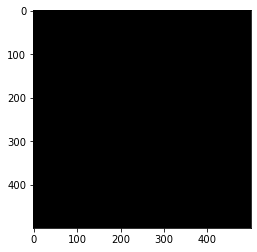

In [17]:
img = cv2.imread('/home/dariojavo/Documents/UCDavis/output/images/view00000/RGB_rendering.jpeg')
plt.imshow(img)

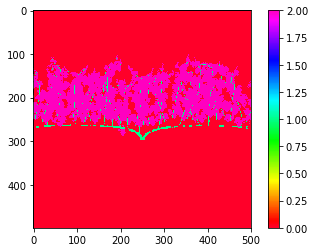

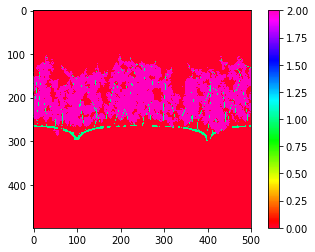

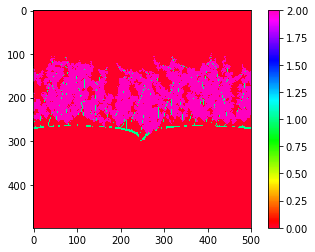

In [27]:
path = '/home/dariojavo/Documents/UCDavis/output/images/'

for i in range(len(camera_positions)):
    if i<10:
        txt2image(path + 'view0000' + str(i) + '/semantic_segmentation.txt')
    if i>=10:
        txt2image(path + 'view000' + str(i) + '/semantic_segmentation.txt')

    <WalnutCanopyParameters>
      <branch_length>4.0 0.75 0.75</branch_length>
      <canopy_origin>0.0</canopy_origin>
      <canopy_rotation>0.0</canopy_rotation>
      <fruit_radius>0.04</fruit_radius>
      <fruit_subdivisions>16.0</fruit_subdivisions>
      <fruit_texture_file>plugins/canopygenerator/textures/WalnutTexture.png</fruit_texture_file>
      <leaf_length>0.15</leaf_length>
      <leaf_subdivisions>1.0 2.0</leaf_subdivisions>
      <leaf_texture_file>plugins/canopygenerator/textures/WalnutLeaf.png</leaf_texture_file>
      <plant_count>5.0 1.0</plant_count>
      <plant_height>1.5284251522113472</plant_height>
      <plant_spacing>6.0</plant_spacing>
      <row_spacing>8.0</row_spacing>
      <trunk_height>40.0</trunk_height>
      <trunk_radius>0.15</trunk_radius>
      <wood_subdivisions>10.0</wood_subdivisions>
      <wood_texture_file>plugins/canopygenerator/textures/wood.jpg</wood_texture_file>
    </WalnutCanopyParameters>